In [48]:
#import the libraries
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from math import sqrt
import sklearn


In [49]:
#load the dataset
health_df = pd.read_csv('C:/Users/emota osayomore/Downloads/Health_cancer_data.csv')

In [50]:
health_df.head()

,Sample_No,Thickness_of_Clump,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Outcome
0,1,6,2,2,2,2,2,5,1,1,No
1,2,6,6,5,6,7,10,5,2,2,No
2,3,3,2,3,1,2,2,4,2,2,No
3,4,7,9,9,2,4,4,4,7,2,No
4,5,6,3,1,4,3,3,4,3,1,No


In [51]:
health_df.tail()

,Sample_No,Thickness_of_Clump,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Outcome
595,596,7,3,1,1,4,3,4,1,2,No
596,597,6,2,4,1,2,1,4,1,2,No
597,598,6,1,3,1,2,1,4,1,2,No
598,599,5,3,2,3,2,1,2,3,2,No
599,600,6,4,5,2,1,3,1,2,1,No


In [52]:
health_df.isna().any()

Sample_No                      False
Thickness_of_Clump             False
Cell_Size_Uniformity           False
Cell_Shape_Uniformity          False
Marginal_Adhesion              False
Single_Epithelial_Cell_Size    False
Bare_Nuclei                    False
Bland_Chromatin                False
Normal_Nucleoli                False
Mitoses                        False
Outcome                        False
dtype: bool

In [53]:
health_df.shape

(600, 11)

In [54]:
#number of patients according to thickness of clump
health_df ['Thickness_of_Clump'].value_counts()

10    87
5     85
3     77
6     71
4     70
2     50
1     49
7     48
8     38
9     25
Name: Thickness_of_Clump, dtype: int64

In [55]:
print(health_df.keys())

Index(['Sample_No', 'Thickness_of_Clump', 'Cell_Size_Uniformity',
       'Cell_Shape_Uniformity', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Outcome'],
      dtype='object')


In [56]:
dfCancer= health_df.drop('Sample_No' ,axis=1)

In [57]:
dfCancer

,Thickness_of_Clump,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Outcome
0,6,2,2,2,2,2,5,1,1,No
1,6,6,5,6,7,10,5,2,2,No
2,3,2,3,1,2,2,4,2,2,No
3,7,9,9,2,4,4,4,7,2,No
4,6,3,1,4,3,3,4,3,1,No
...,...,...,...,...,...,...,...,...,...,...
595,7,3,1,1,4,3,4,1,2,No
596,6,2,4,1,2,1,4,1,2,No
597,6,1,3,1,2,1,4,1,2,No
598,5,3,2,3,2,1,2,3,2,No


In [58]:
#putting feature variable to x
x=dfCancer.drop('Outcome' ,axis=1)

In [59]:
#adding response variable to y
y=dfCancer['Outcome']

In [60]:
#split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((420, 9), (180, 9), (420,), (180,))

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
random_forest.score(x_train,y_train)
acc_random_forest=round(random_forest.score(x_train,y_train)*100,2)
print(round(acc_random_forest,2,),'%')


100.0 %


In [63]:
random_forest=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1,max_depth=5,oob_score=True)
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [64]:
random_forest.oob_score_

0.9642857142857143

In [65]:
Rf=RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100,max_features='auto',oob_score=True)
parameters={'max_depth': [2,3,5,10,20],'min_samples_leaf':[1,5,10,15,20],'min_samples_split': [2,5,8,10,15,18,25],'n_estimators':[10,25,30,50,100,200]}

In [66]:
from sklearn.model_selection import GridSearchCV
#to instantiate the grid search model
grid_search=GridSearchCV(estimator=Rf,param_grid=parameters,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')
grid_search.fit(x_train,y_train)


Fitting 4 folds for each of 1050 candidates, totalling 4200 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 8, 10, 15, 18, 25],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [67]:
grid_search.best_score_

0.9690476190476192

In [68]:
Rf_best=grid_search.best_estimator_
Rf_best

RandomForestClassifier(max_depth=5, min_samples_split=8, n_jobs=-1,
                       oob_score=True, random_state=42)

In [69]:
#testing new parameters
random_forest=RandomForestClassifier(n_estimators=100,max_features='auto',oob_score=True,random_state=42,max_depth=10,min_samples_split=5,n_jobs=-1)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
random_forest.score(x_train,y_train)
print('oob_score:',round(random_forest.oob_score_)*100,'%')

oob_score: 100 %


In [70]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions=cross_val_predict(random_forest,x_train,y_train,cv=3)
confusion_matrix(y_train,predictions)

array([[251,   8],
       [ 10, 151]], dtype=int64)

In [71]:
Rf_best.feature_importances_

array([0.0760264 , 0.24584069, 0.34475558, 0.01503677, 0.02521533,
       0.18474633, 0.03996337, 0.06270179, 0.00571374])

In [72]:
#the analysis shows that mitoses and marginal adhesionare not too important to 
dfValueImportances=pd.DataFrame({'Features':x_train.columns,'Importance':Rf_best.feature_importances_})
dfValueImportances.sort_values(by='Importance', ascending=False)

,Features,Importance
2,Cell_Shape_Uniformity,0.344756
1,Cell_Size_Uniformity,0.245841
5,Bare_Nuclei,0.184746
0,Thickness_of_Clump,0.076026
7,Normal_Nucleoli,0.062702
6,Bland_Chromatin,0.039963
4,Single_Epithelial_Cell_Size,0.025215
3,Marginal_Adhesion,0.015037
8,Mitoses,0.005714


In [73]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Rf,x_train,y_train,cv=10,scoring='accuracy')
print('scores:',scores)
print('mean:',scores.mean())
print('Standard Deviation:',scores.std())
#the model has an average accuracy of 96% and a standard deviation of about 2%


scores: [1.         0.97619048 0.97619048 0.95238095 1.         0.95238095
 0.95238095 0.97619048 0.9047619  0.92857143]
mean: 0.9619047619047618
Standard Deviation: 0.028571428571428567


[Text(0.39705882352941174, 0.9166666666666666, 'Cell_Shape_Uniformity <= 3.5\ngini = 0.475\nsamples = 262\nvalue = [257, 163]\nclass = malignant'),
 Text(0.11764705882352941, 0.75, 'Bare_Nuclei <= 3.5\ngini = 0.083\nsamples = 152\nvalue = [242, 11]\nclass = malignant'),
 Text(0.058823529411764705, 0.5833333333333334, 'gini = 0.0\nsamples = 137\nvalue = [226, 0]\nclass = malignant'),
 Text(0.17647058823529413, 0.5833333333333334, 'Normal_Nucleoli <= 2.5\ngini = 0.483\nsamples = 15\nvalue = [16, 11]\nclass = malignant'),
 Text(0.11764705882352941, 0.4166666666666667, 'Marginal_Adhesion <= 3.5\ngini = 0.133\nsamples = 9\nvalue = [13, 1]\nclass = malignant'),
 Text(0.058823529411764705, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [13, 0]\nclass = malignant'),
 Text(0.17647058823529413, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = bening'),
 Text(0.23529411764705882, 0.4166666666666667, 'gini = 0.355\nsamples = 6\nvalue = [3, 10]\nclass = bening'),
 Text(0.6764705882352942, 0.75, 'Ba

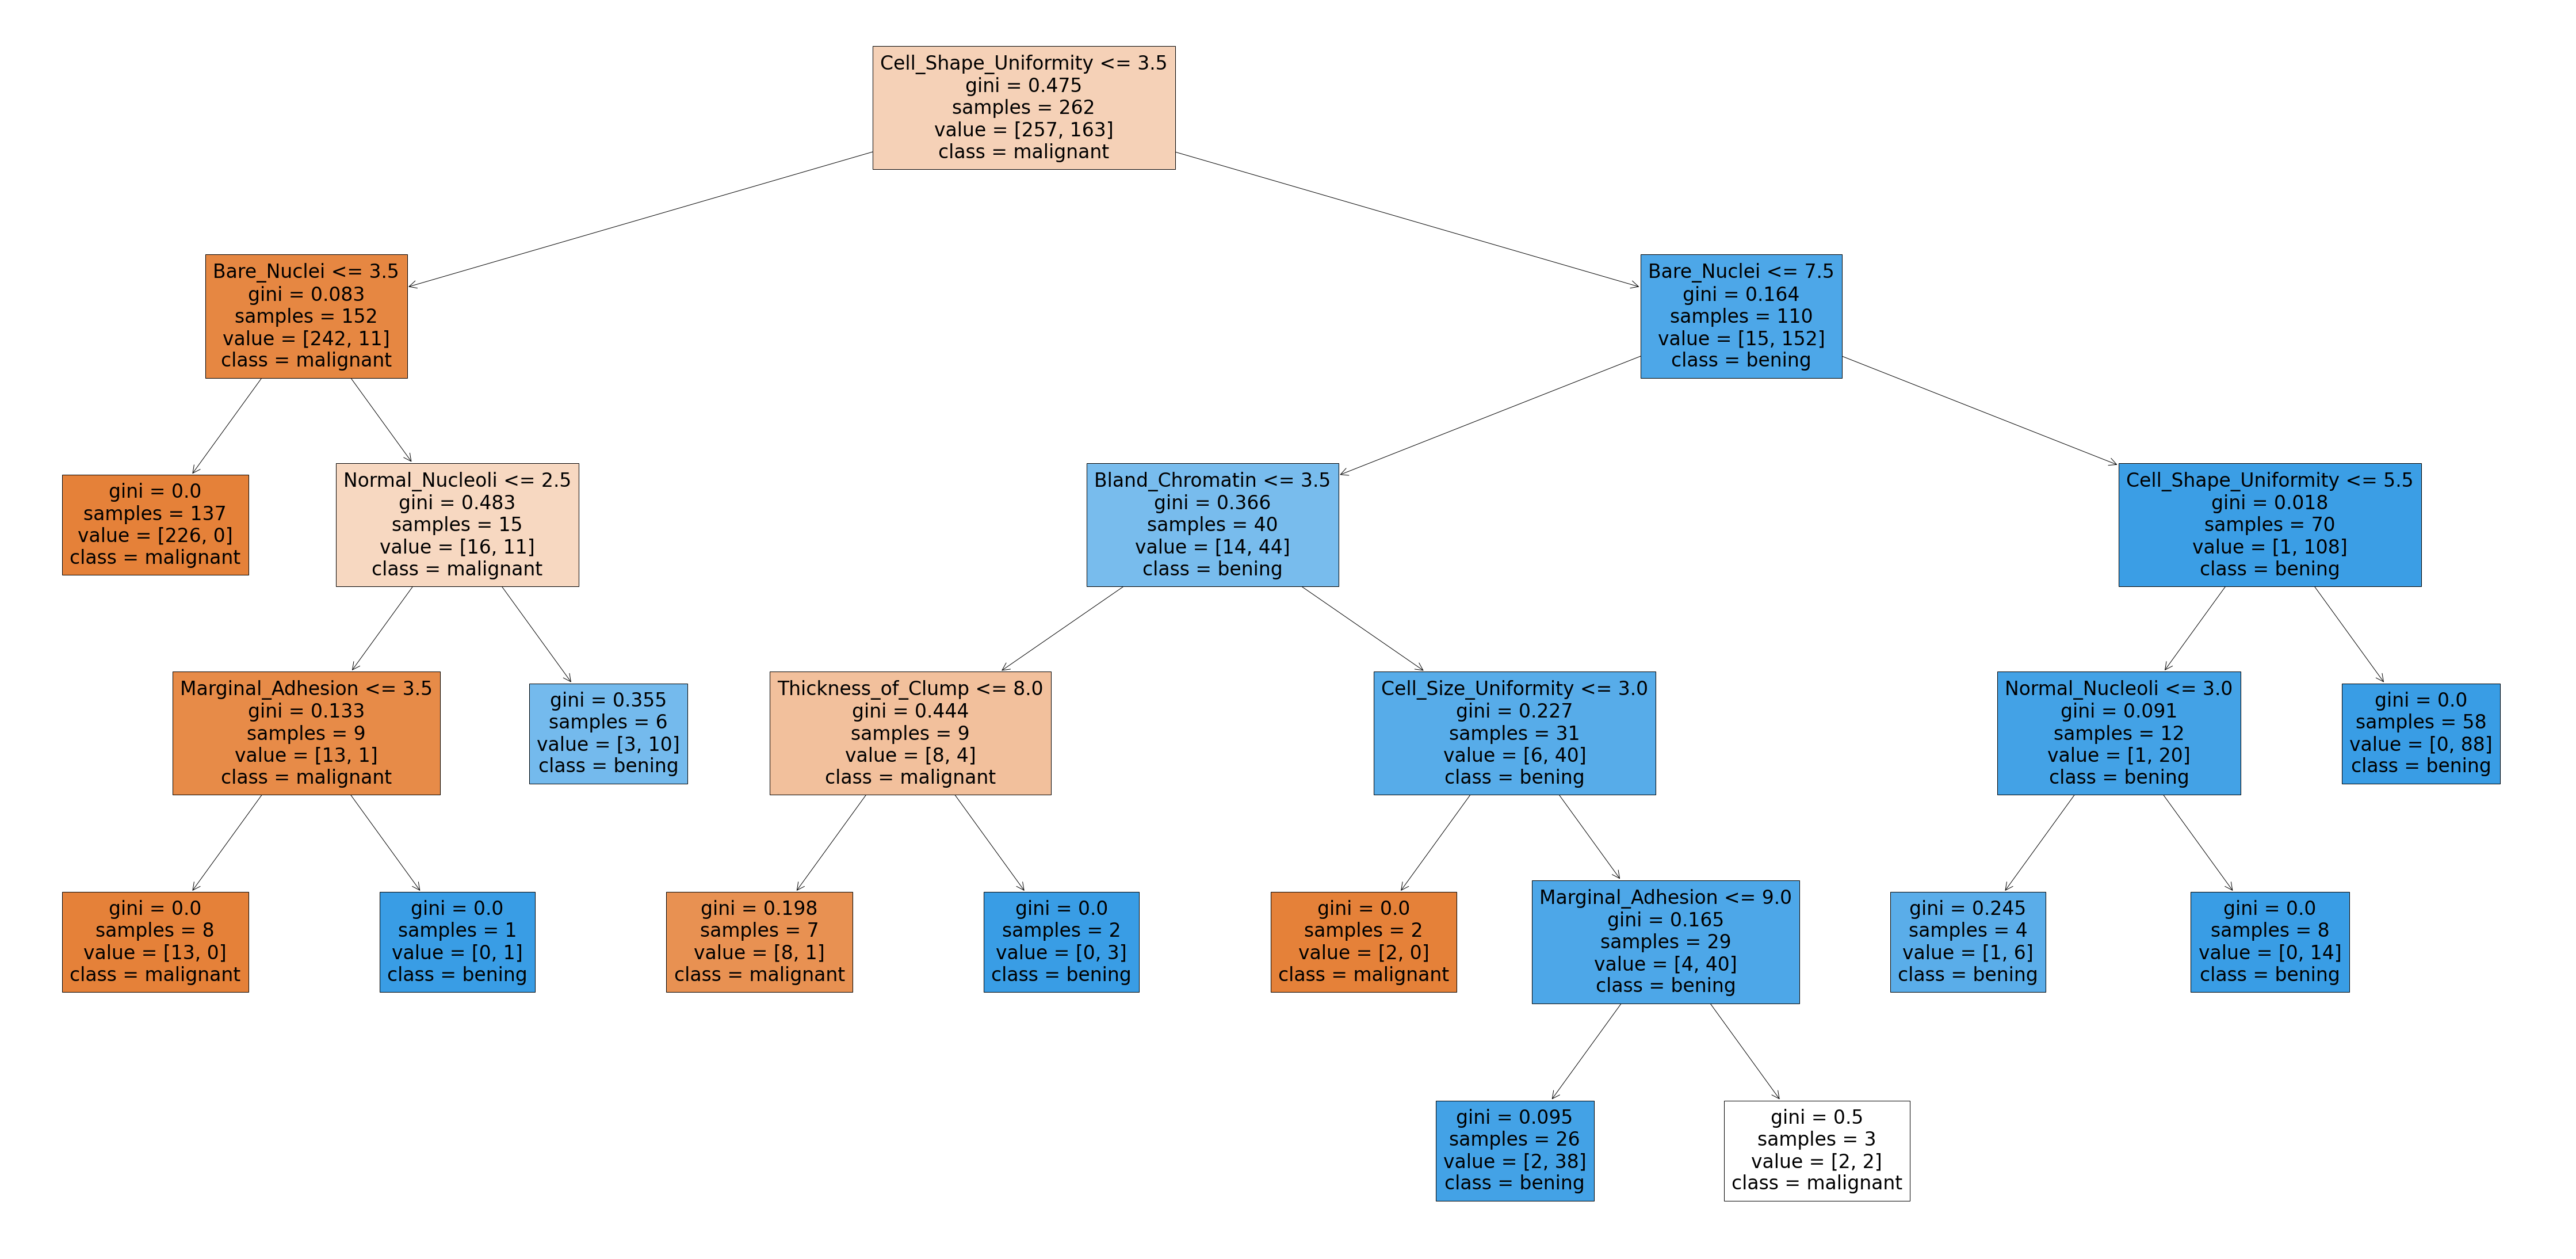

In [75]:
from sklearn.tree import plot_tree
plt.figure (figsize=(80,40))
plot_tree(Rf_best.estimators_[5],feature_names=x.columns,class_names=['malignant','bening'],filled=True)

[Text(0.5357142857142857, 0.9166666666666666, 'Cell_Shape_Uniformity <= 4.5\ngini = 0.464\nsamples = 268\nvalue = [266, 154]\nclass = malignant'),
 Text(0.35714285714285715, 0.75, 'Bare_Nuclei <= 7.5\ngini = 0.141\nsamples = 176\nvalue = [255, 21]\nclass = malignant'),
 Text(0.2857142857142857, 0.5833333333333334, 'Marginal_Adhesion <= 7.5\ngini = 0.066\nsamples = 167\nvalue = [255, 9]\nclass = malignant'),
 Text(0.21428571428571427, 0.4166666666666667, 'Thickness_of_Clump <= 9.0\ngini = 0.052\nsamples = 166\nvalue = [255, 7]\nclass = malignant'),
 Text(0.14285714285714285, 0.25, 'Bare_Nuclei <= 4.5\ngini = 0.045\nsamples = 165\nvalue = [255, 6]\nclass = malignant'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.016\nsamples = 156\nvalue = [247, 2]\nclass = malignant'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.444\nsamples = 9\nvalue = [8, 4]\nclass = malignant'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = bening'),
 T

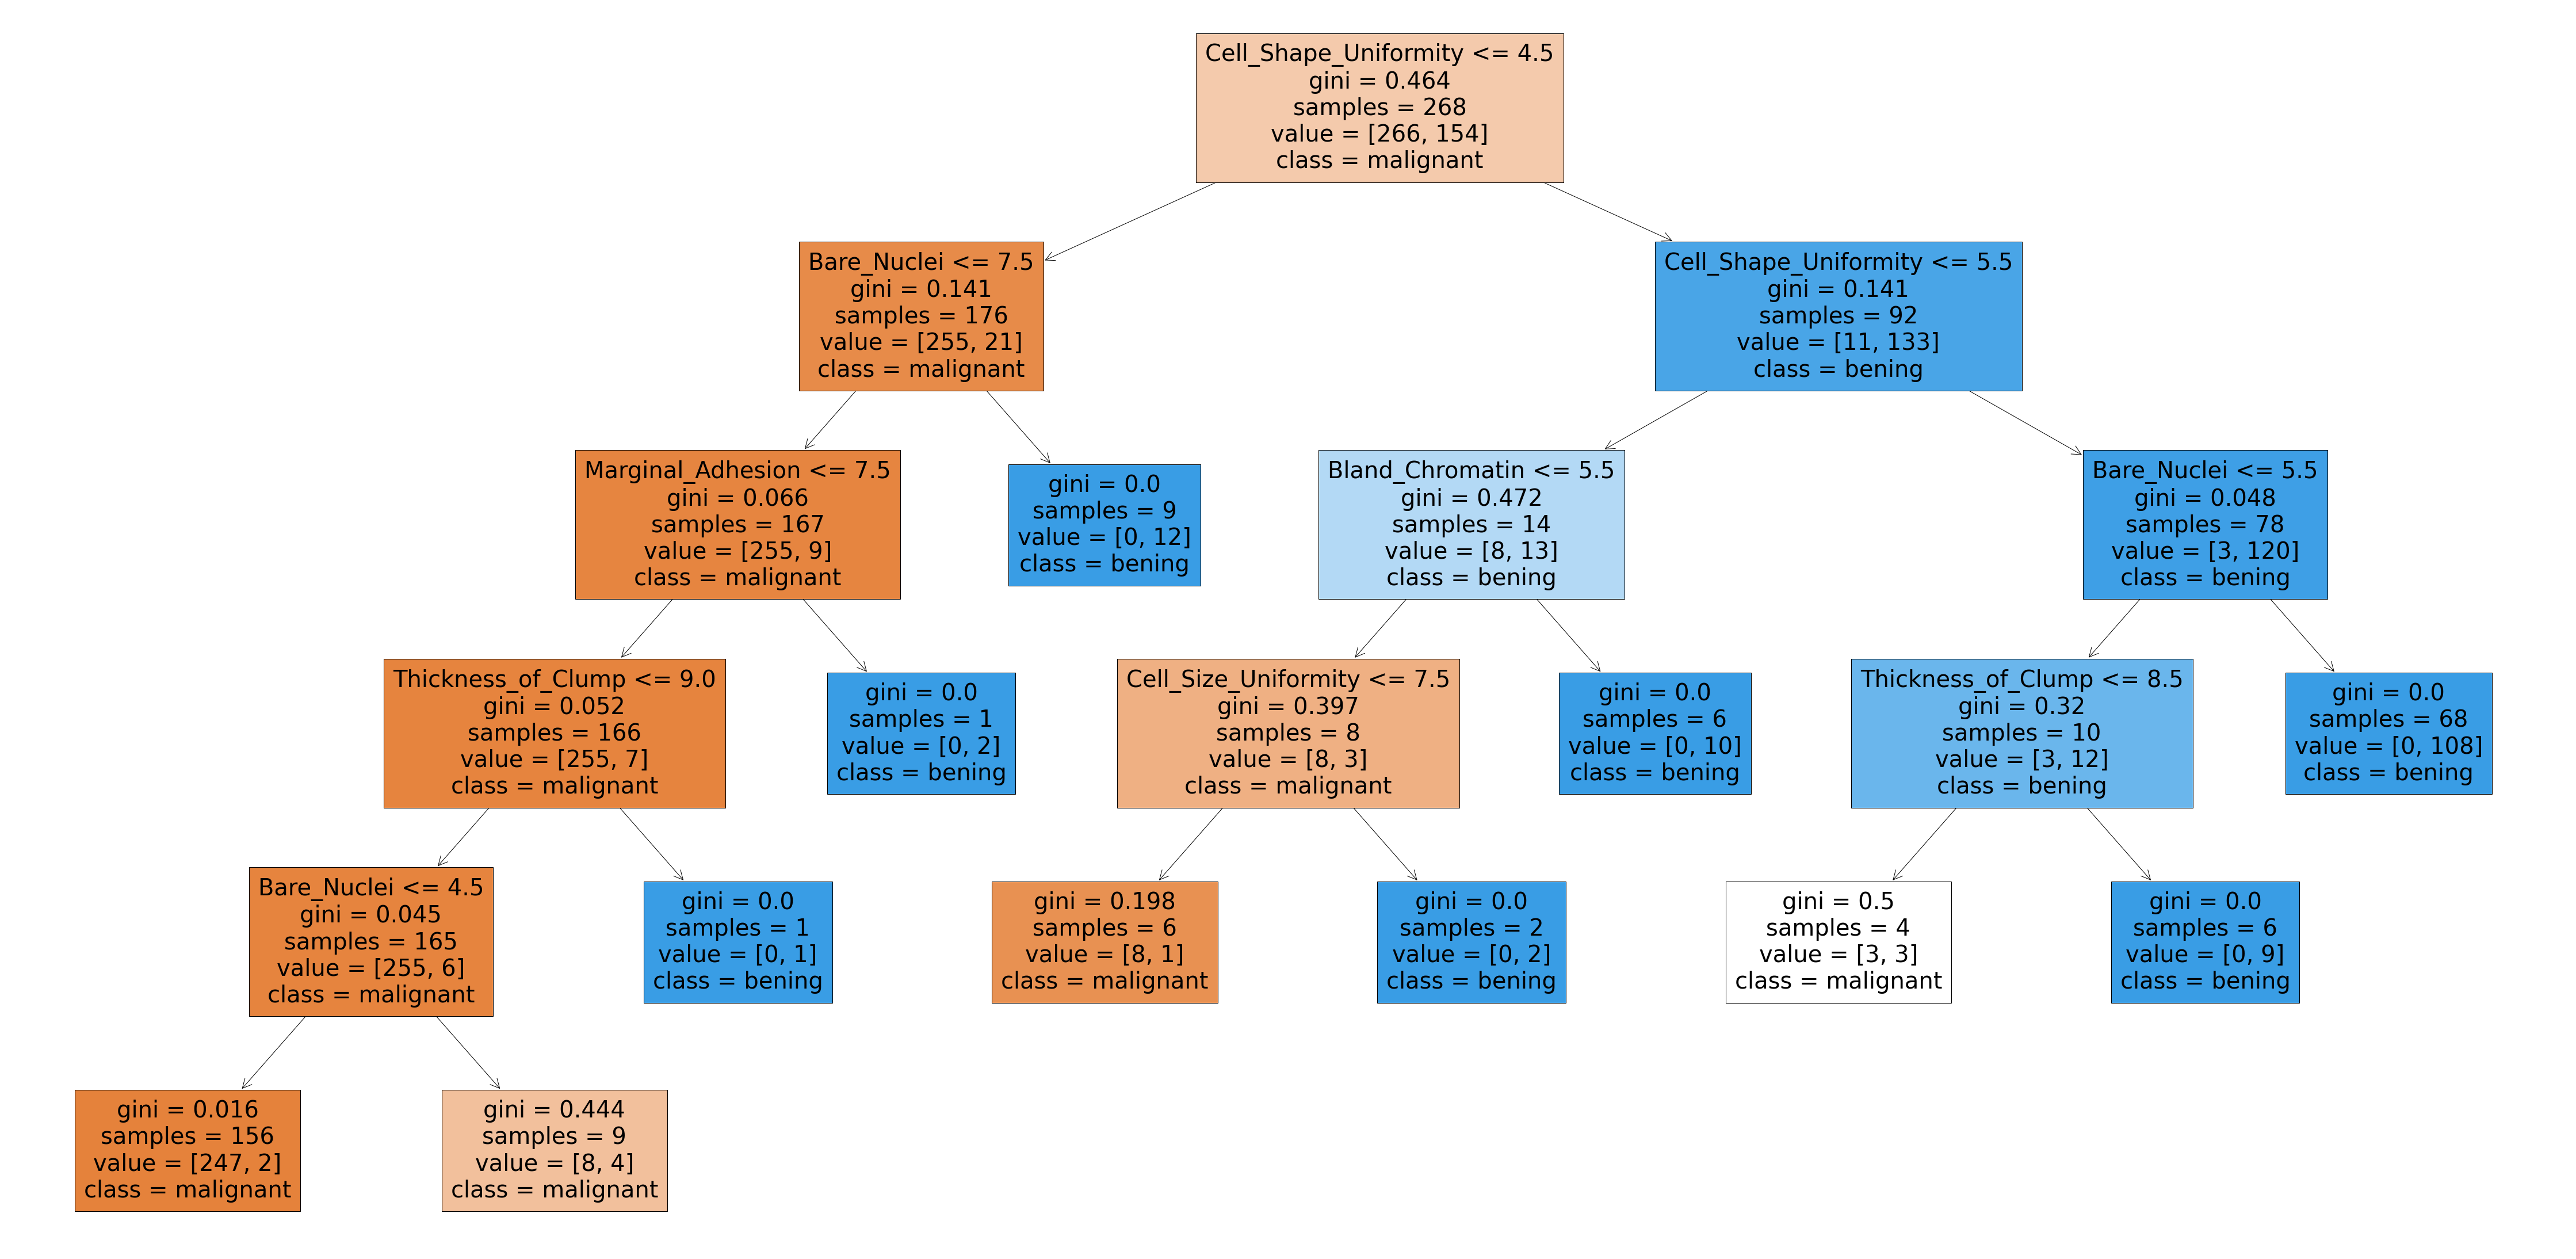

In [76]:
from sklearn.tree import plot_tree
plt.figure (figsize=(80,40))
plot_tree(Rf_best.estimators_[70],feature_names=x.columns,class_names=['malignant','bening'],filled=True)